In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pyphi
import marshall_intrinsic_units as miu

pathlib.Path("plots").mkdir(parents=True, exist_ok=True)

/home/gfindlay/projects/Marshall-Intrinsic-Units/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


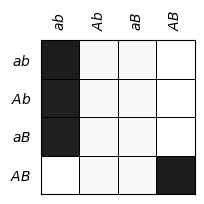

In [2]:
network, state = miu.get_minimal_micro_example()
fig, ax = miu.plot_sbs_tpm(network, height=2)
fig.savefig("plots/min_micro_tpm.svg")

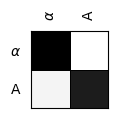

In [3]:
network, state = miu.get_minimal_macro_example()
fig, ax = miu.plot_sbs_tpm(network, height=1)
fig.savefig("plots/min_macro_tpm.svg")

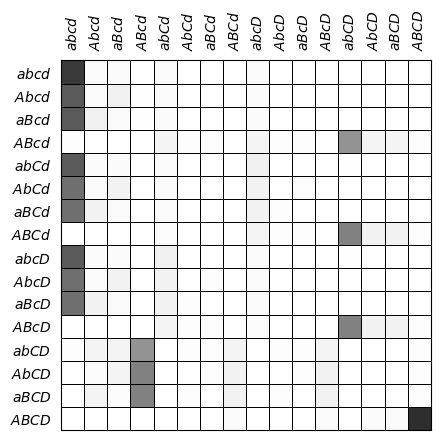

In [4]:
network, state = miu.get_coarsegrain_micro_example()
fig, ax = miu.plot_sbs_tpm(network)
fig.savefig("plots/cg_micro_tpm.svg")

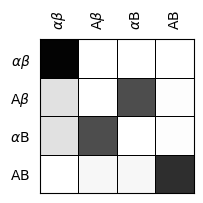

In [5]:
network, state = miu.get_coarsegrain_macro_example()
fig, ax = miu.plot_sbs_tpm(network, height=2)
fig.savefig("plots/cg_macro_tpm.svg")

<>:11: SyntaxWarning: invalid escape sequence '\i'
<>:11: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_1503586/2055921327.py:11: SyntaxWarning: invalid escape sequence '\i'
  return "$\it{" + "".join(text) + "}$"


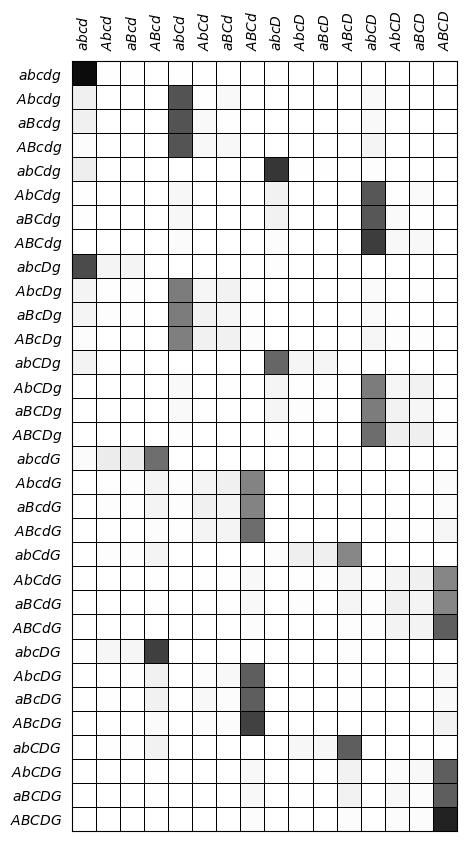

In [7]:
network, state = miu.get_blackbox_micro_example()
# fig, ax = miu.plot_sbs_tpm(network, height=40, use_node_labels=True)
# fig.savefig("plots/bbx_micro_full_tpm.svg")

use_node_labels = True
height = 10
subset = (0, 1, 2, 3, 6)


def _italicize(text):
    return "$\it{" + "".join(text) + "}$"


subsystem = pyphi.Subsystem(network, state, subset)
subsystem_node_labels = tuple(
    subsystem.node_labels[i] for i in subsystem.node_indices
)
subsystem_node_labels = pyphi.node.NodeLabels(
    subsystem_node_labels, tuple(np.arange(len(subsystem_node_labels)))
)

sbs = pyphi.convert.state_by_node2state_by_state(subsystem.proper_cause_tpm)
input_states_labels = list(pyphi.utils.all_states(subsystem.size))

n_output_states = sbs.shape[1] // 2
sbs = sbs[:, :n_output_states] + sbs[:, n_output_states:]

if use_node_labels:
    input_state_labels = [
        pyphi.visualize.phi_structure.text.Labeler(
            state, subsystem_node_labels, postprocessor=_italicize
        ).nodes(subsystem_node_labels.node_indices)
        for state in input_states_labels
    ]
    output_state_labels = [
        pyphi.visualize.phi_structure.text.Labeler(
            state, subsystem_node_labels, postprocessor=_italicize
        ).nodes(subsystem_node_labels.node_indices[:-1])
        for state in input_states_labels[:n_output_states]
    ]

figsize = None if height is None else (height / 2, height)
fig, ax = plt.subplots(figsize=figsize)
ax.pcolormesh(sbs, edgecolors="k", linewidth=0.5, cmap="Greys", vmin=0, vmax=1)
ax.tick_params(
    top=False,
    labeltop=use_node_labels,
    bottom=False,
    labelbottom=False,
    left=False,
    labelleft=use_node_labels,
)
if use_node_labels:
    ax.set_xticks(
        np.arange(len(output_state_labels)) + 0.5,
        labels=output_state_labels,
        rotation=90,
    )
    ax.set_yticks(np.arange(len(input_state_labels)) + 0.5, labels=input_state_labels)
ax.set_aspect("equal")
ax.invert_yaxis()

# return fig, ax
fig.savefig("plots/bbx_micro_half_tpm.svg")

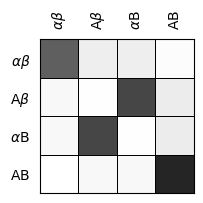

In [8]:
network, state = miu.get_blackbox_macro_example()
fig, ax = miu.plot_sbs_tpm(network, height=2)
fig.savefig("plots/bbx_macro_tpm.svg")

In [9]:
def get_mappings(n_micro_elements):
    micro_states = np.array(list(pyphi.utils.all_states(n_micro_elements)))
    n_micro_states = micro_states.shape[0]
    for macro_state in pyphi.utils.all_states(n_micro_states):
        yield micro_states, np.atleast_2d(macro_state).T


def plot_mapping(
    micro_states, macro_states, micro_node_labels, macro_node_labels, figsize=None
):
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=figsize, width_ratios=(micro_states.shape[1], 1)
    )
    ax1.pcolormesh(
        micro_states, edgecolors="grey", linewidth=0.5, cmap="Greys", vmin=0, vmax=1
    )
    ax2.pcolormesh(
        macro_states, edgecolors="grey", linewidth=0.5, cmap="Greys", vmin=0, vmax=1
    )
    for ax in (ax1, ax2):
        ax.tick_params(top=False, labeltop=False, bottom=False, labelbottom=True)
        ax.set_yticks([])
        ax.invert_yaxis()
    ax1.set_xticks(
        np.arange(len(micro_node_labels)) + 0.5,
        labels=micro_node_labels,
        fontsize=12,
    )
    ax2.set_xticks(
        np.arange(len(macro_node_labels)) + 0.5,
        labels=macro_node_labels,
        fontsize=12,
    )
    return fig, (ax1, ax2)


if False:
    micro_node_labels = ("A", "B")
    macro_node_labels = "α"
    mappings = list(get_mappings(len(micro_node_labels)))
    for i, (micro_states, macro_states) in enumerate(mappings):
        fig, ax = plot_mapping(
            micro_states,
            macro_states,
            micro_node_labels,
            macro_node_labels,
            figsize=(1, 3),
        )
        fig.savefig(f"plots/mappings/mapping{i}.svg")

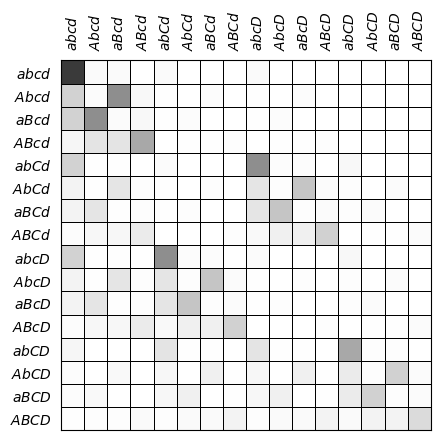

In [10]:
network, _ = miu.get_something_from_nothing_micro_example()
fig, ax = miu.plot_sbs_tpm(network)
fig.savefig("plots/sfn_micro_tpm.svg")

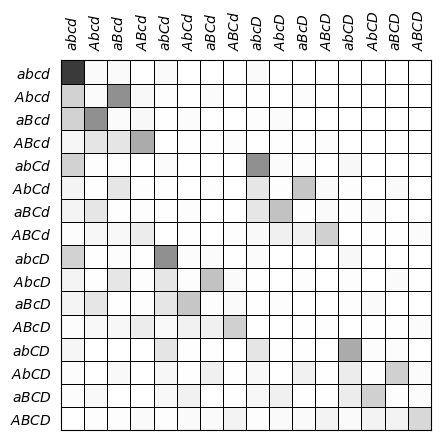

In [11]:
network, _ = miu.get_something_from_nearly_nothing_micro_example()
fig, ax = miu.plot_sbs_tpm(network)
fig.savefig("plots/sfnn_micro_tpm.svg")

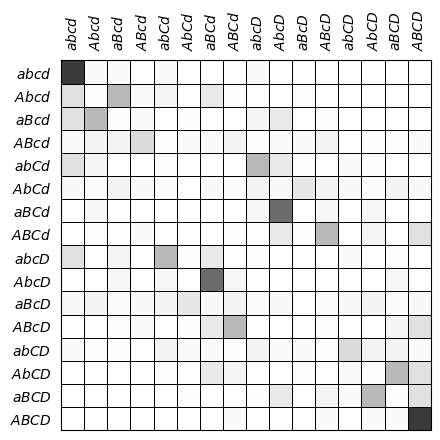

In [12]:
network, _ = miu.get_something_from_something_micro_example()
fig, ax = miu.plot_sbs_tpm(network)
fig.savefig("plots/sfs_micro_tpm.svg")